## Internship in TechnoEduHacks


<span style="color:red"> **Machine Learning Project_Task 3**</span>


<span style="color: #26B260"> ***Author: Consolas HODONOU, Msc in Biostatistics***</span>

consolashodonou@gmail.com


<hr/> <h1 style="text-align: center;"><span style="color: #00000;"<em><strong>  PROJECT : Wine quality prediction </strong></em></span></h1><hr />

## 1- Aim of the project

Use a dataset containing wine features to predict the quality of the wine.

## 2- Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix,precision_score


import warnings
warnings.filterwarnings("ignore")

## 3- Import dataset

In [2]:
data = pd.read_csv("F:\\INTERNSHIP_FILES\\wine_quality\\winequality-red.csv")

## 4- Data Preprocessing

In [3]:
# Display dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Shape of dataset
print(f"This dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

This dataset contains 1599 rows and 12 columns.


In [5]:
# Columns of dataset
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Check missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Comment: 

There is no missing values in our dataset, meaning that there is no need to apply any kind of transformation aimed to handle missing values.

In [7]:
# Check information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Comment: 

In our dataset, all variables are numerical variables with one which is of type "integer"(quality) and others which are "float".

In [8]:
# Display unique modalities of target variable
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Comment:

Our target variable have six modalities meaning that we are in case of polynomial logistic regression. 

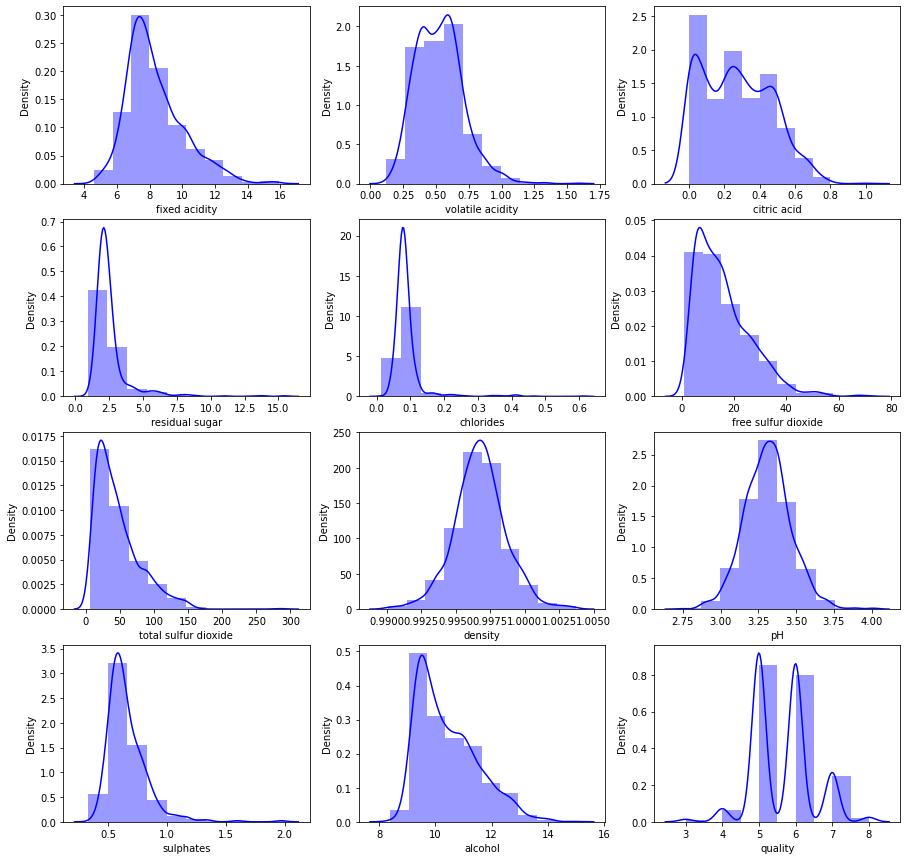

In [11]:
# Check distribution of variables
plt.subplots(4,3,figsize=(15,15))
for i , col in enumerate(data.columns,1) :
    plt.subplot(4,3,i)
    sns.distplot(data[col],kde=True, bins=10, color='blue')

## Comment:

The variable "density" is one which follows normal distribution in the set of variables. 

Others variables are not normaly distributed.

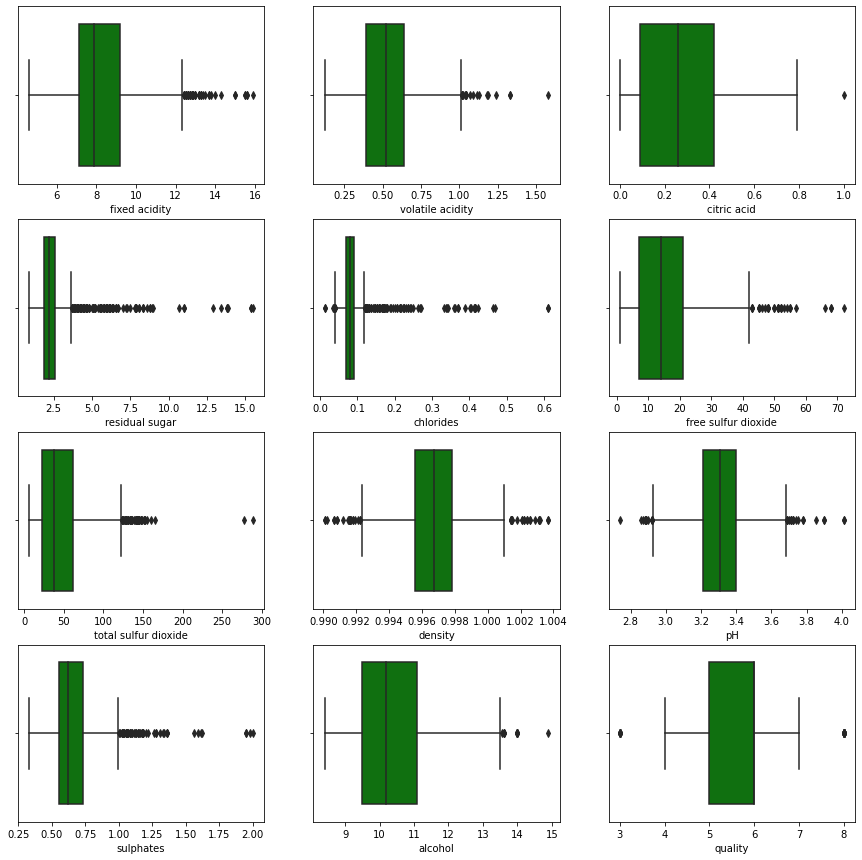

In [12]:
# Check outliers
plt.subplots(4,3,figsize=(15,15))
for i , col in enumerate(data.columns,1) :
    plt.subplot(4,3,i)
    sns.boxplot(data[col],color='green')

## Comment:

From the boxplots, there are lot of outliers in dataset variables. Then, we will standardize these values to reduce their impact on analysis.

## 5- Data Analysis

#### Descriptive statistics

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

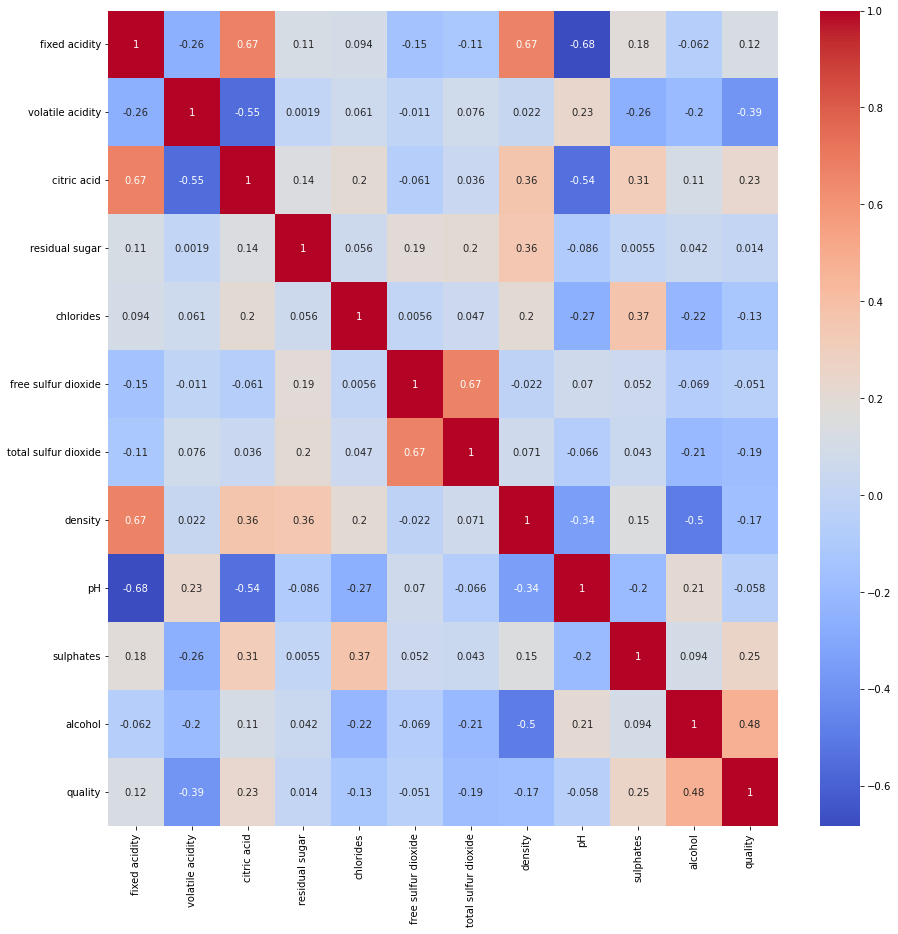

In [14]:
# Matrice de corrélation
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm',annot=True)

### Comment: 

The target variable "quality" is respectively more positively correlated with independant variables such as alcohol, sulphates, citric acid, fixed activity, residual sugar and it's negatively correlated with others variables.

    -Fixed acidity is well positively correlated with density, citric acid (0.67)
    -free sulfur dioxide is well positively correlated with total sulfur dioxide too(0.67)
    -ph is well negatively correlated with fixed acidity(-0.68)

### Machine learning

### Fonctions

In [15]:
def get_split_data(X, y):
    """This function makes spliting of a given dataset. It takes: 
    Parameters
    ===========
    X: list or dataframe contains only explanatory variables
    y: list or vector contains only target variable
    
    Returns
    ===========
    X_train, y_train, X_test, y_test
    """
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)
    
    return X_train, X_test, y_train, y_test

In [16]:
def model(name, X_train, y_train, X_test):
    """This function standardize X_train and X_test. It also
    performs a given model on the training set and the test set. It takes:
    
    Parameters
    ===========
    name: name of the model to perform
    X_train: train set of explanatory variable obtained after spliting
    y_train: train set of target variable obtained after spliting
    X_test:  test set of explanatory variable obtained after spliting
    
    Returns
    ==========
    model.fit and predicted values
    """
    scaler = RobustScaler() 
    X_train_scaled = scaler.fit_transform (X_train) 
    X_test_scaled = scaler.transform (X_test)
    
    if name == 'Logistic':
        model = LogisticRegression()
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        return y_pred
    
    if name == 'SVC':
        model = SVC()
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        return y_pred

In [17]:
def get_performance(y_test, y_pred):
    """This function gets the performance of model. It takes:
    Parameters
    ===========
    y_test: test set of target variable obtained after spliting
    y_pred: set of predicted values of target variable based on explanatory test set
    
    Returns
    ===========
    dataframe of metrics
    """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    #Create dataframe of metrics
    metrics_model = pd.DataFrame({
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall]
    })
    # Display the metrics DataFrame
    print("Metrics for the model:")
    print (metrics_model)

In [19]:
def matrix_conf(y_test, y_pred):
    """This function displays confusion matrix based on model prediction. It takes:
    
    Parameters
    ===========
    y_test: test set of target variable obtained after spliting
    y_pred: set of predicted values of target variable based on explanatory test set
    
    Returns
    ===========
    dataframe of confusion matrix
    """
    classes = np.unique(np.concatenate((y_test, y_pred)))
    conf_matrix = confusion_matrix(y_test, y_pred, labels=classes)
    
    #Create a dataframe
    conf_mat = pd.DataFrame(conf_matrix, columns=[f"Class_{elt}" for elt in classes],
                             index=[f"Class_{elt}" for elt in classes])
    return conf_mat

### Application

In [20]:
#Define features and target variables
X = data.drop(['quality'], axis = 1)

y = data['quality']

In [21]:
X_train, X_test, y_train, y_test = get_split_data(X,y)

### Model 1 : Logistic Regression

In [22]:
y_pred = model('Logistic', X_train, y_train, X_test)

In [23]:
get_performance(y_test, y_pred)

Metrics for the model:
   Accuracy  Precision  Recall
0    0.5825   0.543804  0.5825


In [24]:
matrix_conf(y_test, y_pred)

,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Class_3,0,0,1,0,0,0
Class_4,0,0,10,3,0,0
Class_5,0,0,122,41,1,0
Class_6,0,0,58,99,12,0
Class_7,0,0,3,33,12,0
Class_8,0,0,0,1,4,0


## Comment:

- The accuracy score of Logistic regression model is 0.58 meaning that this model is able to find at least 5 good predictions of wine quality in average over 10 wines. That's not so good. Then, we will check with other model. 


- The precision score is 0.54 meaning that on 10 positives predictions, at least 5 are right. Then, there is a risk to have 5 others like false neagtive. 

### Model 2 : Support Vector Classifier

In [25]:
y_pred = model('SVC', X_train, y_train, X_test)

In [26]:
get_performance(y_test, y_pred)

Metrics for the model:
   Accuracy  Precision  Recall
0      0.62   0.593976    0.62


In [27]:
matrix_conf(y_test, y_pred)

,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8
Class_3,0,0,1,0,0,0
Class_4,0,0,9,4,0,0
Class_5,0,0,126,37,1,0
Class_6,0,0,56,112,1,0
Class_7,0,0,3,35,10,0
Class_8,0,0,0,2,3,0


## Comment:

- The accuracy score of SVC model is 0.62 meaning that this model is able to find at least 6 good predictions of wine quality in average over 10 wines. That's good but still less sufficient for better prediction of wine quality. For future studies, we can try to make the estimations with others robust models. 


- The precision score is 0.59 meaning that on 10 positives predictions, at least 5 are right. Then, there is a risk to have 5 others like false neagtive. 

## END